# **BT thực hành 4.1: Gradient Descent - Heights và Weights**


> Cập nhật: **07/2023**



---
## **Yêu cầu 1: Hồi quy tuyến tính theo phương pháp Gradient Descent**
Cho tập tin dữ liệu về chiều cao (heights.txt) và cân nặng (weights.txt)
- Tạo 2 arrays: heights và weights để lưu trữ 2 tập tin dữ liệu trên.
- Chuyển heights sang mét (heights*0.0254) và weights sang kg (weights * 0.453592)
- Biểu diễn trực quan dữ liệu heights, weights
- Đặt X = heights đã chuyển theo định dạng chuẩn, y = weights
- Với y = mx + b (weights = m*heights + b), xác định các tham số tính m và b theo phương pháp Gradient Descent
- Biểu diễn trực quan kết quả hồi quy tuyến tính
- Với chiều cao là 1.8, 1.9, 2.0 thì cân nặng lần lượt là bao nhiêu ?
---

In [1]:
## Môi trường lập trình
from google.colab import drive
drive.mount("/content/gdrive")
folder = '/content/gdrive/My Drive/Colab Notebooks/LDS3/Thuc hanh/Ch4_Calculus'

Mounted at /content/gdrive


In [1]:
## Thư viện
import matplotlib.pyplot as plt
import numpy             as np
import pandas            as pd
import seaborn           as sns

from sklearn             import linear_model

In [2]:
## Đọc tập tin chiều cao heights.txt vào array 'heights' và chuyển đổi đơn vị (mét)
f    = open('Data/heights.txt')
data = f.read()
f.close()

heights = np.array(eval(data)) * 0.0254
print('heights[] (mét):', heights.size, 'mẫu;', heights[0:5])

heights[] (mét): 1015 mẫu; [1.8796 1.8796 1.8288 1.8288 1.8542]


In [3]:
## Đọc tập tin cân nặng weights.txt vào array 'weights' và chuyển đổi đơn vị (kg)
f    = open( 'Data/weights.txt')
data = f.read()
f.close()

weights = np.array(eval(data)) * 0.453592
print('weights[] (kg):', weights.size, 'mẫu;', weights[0:5])

weights[] (kg): 1015 mẫu; [81.64656  97.52228  95.25432  95.25432  85.275296]


<Figure size 1200x800 with 0 Axes>

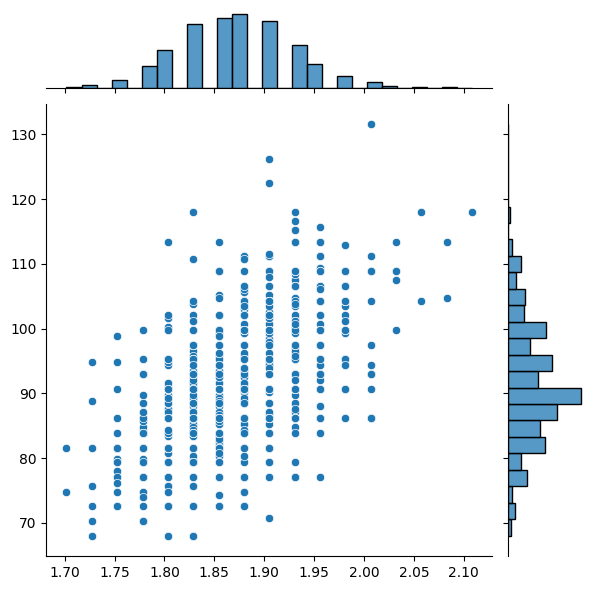

In [5]:
## Biểu diễn trực quan dữ liệu
plt.figure(figsize = (12, 8))
sns.jointplot(x = heights, y = weights)
plt.show()

In [6]:
## Mức độ tương quan (Pearson correlation) giữa heights và weights
np.corrcoef(heights, weights)

array([[1.        , 0.53153932],
       [0.53153932, 1.        ]])

In [16]:
## Mô hình hóa phương trình đường thẳng
##    Lưu ý: Thêm 1 vào cột đầu tiên của X để có cùng số chiều với vector tham số (m, b)
X    = heights
xHat = np.c_[np.ones(heights.size), heights]
y    = weights
print(xHat)

[[1.     1.8796]
 [1.     1.8796]
 [1.     1.8288]
 ...
 [1.     1.905 ]
 [1.     1.905 ]
 [1.     1.8542]]


In [8]:
##------------------------------------------------------------------------------
## Hàm thực hiện thuật toán Gradient Descent
##------------------------------------------------------------------------------
def gradient_descent(rho, x, y, numIterations):
    # Các tham số:
    #     rho: learning rate
    #     x  : ma trận input  x = [[1 x0],[1 x1], [1  x2], ...]
    #     y  : vector  output y = [y0, y1, y2, ...]
    #     numIterations: số vòng lặp

    # Kích thước tập mẫu (training set)
    N = x.shape[0]

    # Khởi tạo (tùy ý) vector tham số cần xác định: theta = (b, m) = [1, 1]
    theta = np.ones(2)

    # Tìm cực tiểu địa phương của loss fuction (di chuyển dần dần ngược dấu đạo hàm)
    for iter in range(0, numIterations):
        yHat = np.dot(x, theta)
        loss = (yHat - y)

        # Đạo hàm của hàm J (riêng phần theo theta[0] và theta[1])
        theta0_prime = np.sum(loss)/N           # đạo hàm theo theta0
        theta1_prime = np.sum(loss * x[:,1])/N  # đạo hàm theo theta1

        gradient = np.array([theta0_prime, theta1_prime])

        # Di chuyển ngược dấu đạo hàm đến điểm mới
        theta = theta - (rho * gradient)
    return theta
##------------------------------------------------------------------------------

In [9]:
## Áp dụng Gradient Descent để xác định theta = (b, m)
rho   = 0.001 # learning rate
theta = gradient_descent(rho, xHat, y, 10000)
print(theta)

[19.96584766 38.16395667]


In [10]:
## Phương trình đường thẳng (không gian 2D): y = m.x + b
weights_predict_GD2 = theta[1] * X + theta[0]
print('Phương trình hồi quy tuyến tính:')
print('   weight = (', theta[1], ') * height + (', theta[0], ')')

Phương trình hồi quy tuyến tính:
   weight = ( 38.163956666275006 ) * height + ( 19.965847664873902 )


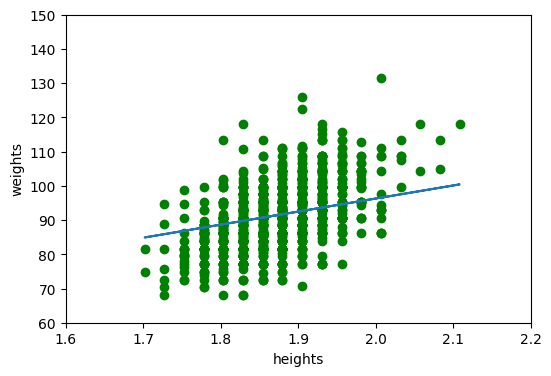

In [11]:
## Biểu diễn trực quan kết quả của Gradient Descent
plt.figure(figsize = (6, 4))
plt.xlim(1.6,2.2)
plt.ylim(60,150)
plt.scatter(xHat[:,1], weights, color = "green")
plt.plot(X, weights_predict_GD2)
plt.xlabel("heights")
plt.ylabel("weights")
plt.show()

In [12]:
##------------------------------------------------------------------------------
## Hàm thực hiện Gradient Descent (Tính đạo hàm bằng cách nhân ma trận)
##------------------------------------------------------------------------------
def gradient_descent_mtx(rho, x, y, numIterations):
    # Các tham số:
    #     rho: learning rate
    #     x  : ma trận input  x = [[1 x0],[1 x1], [1  x2], ...]
    #     y  : vector  output y = [y0, y1, y2, ...]
    #     numIterations: số vòng lặp

    # Kích thước tập mẫu (training set)
    N = x.shape[0]

    # Khởi tạo (tùy ý) vector tham số cần xác định: theta = (b, m) = [1, 1]
    theta = np.ones(2)

    # Tìm cực tiểu địa phương của loss fuction (di chuyển dần dần ngược dấu đạo hàm)
    for iter in range(0, numIterations):
        yHat = x @ theta
        loss = (yHat - y)

        # Đạo hàm của hàm J (riêng phần theo theta[0] và theta[1])
        gradient = np.dot(x.T, loss) / N

        # Di chuyển ngược dấu đạo hàm đến điểm mới
        theta = theta - (gradient * rho)
    return theta

In [13]:
## Áp dụng Gradient Descent để xác định theta = (b, m)
theta = gradient_descent_mtx(rho, xHat, y, 10000)

In [14]:
## Phương trình đường thẳng (không gian 2D): y = m.x + b
weights_predict_GD = theta[1] * X + theta[0]
print('Phương trình hồi quy tuyến tính:')
print('   weight = (', theta[1], ') * height + (', theta[0], ')')

Phương trình hồi quy tuyến tính:
   weight = ( 38.163956666275006 ) * height + ( 19.965847664873902 )


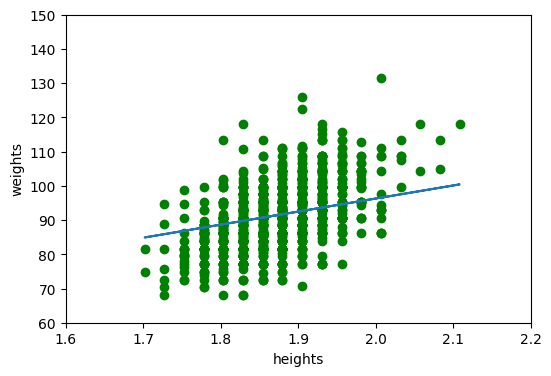

In [15]:
## Biểu diễn trực quan kết quả của Gradient Descent
plt.figure(figsize = (6, 4))
plt.xlim(1.6, 2.2)
plt.ylim(60, 150)
plt.scatter(xHat[:,1], weights, color = "green")
plt.plot(X, weights_predict_GD)
plt.xlabel("heights")
plt.ylabel("weights")
plt.show()

In [16]:
## Dự đoán cân nặng dựa trên phương trình hồi quy
height = np.array([1.8, 1.9, 2.0])
weight = (theta[1] * height) + theta[0]
weight

array([88.66096966, 92.47736533, 96.293761  ])

In [6]:
print(weights)
print(heights)


[81.64656 97.52228 95.25432 ... 92.98636 86.18248 88.45044]
[1.8796 1.8796 1.8288 ... 1.905  1.905  1.8542]


In [7]:
regr = linear_model.LinearRegression(fit_intercept = False)


In [10]:
xHat = np.c_[np.ones(heights.size), heights]

In [11]:
regr.fit(xHat, weights)

LinearRegression(fit_intercept=False)

In [12]:
print(regr.coef_)
print(regr.intercept_)

[-68.55285156  85.42051044]
0.0


In [14]:
print(regr.coef_)
print(regr.coef_[0])


[-68.55285156  85.42051044]
-68.55285156270787


---
## **Yêu cầu 2: Hồi quy tuyến tính bằng hàm của sklearn**
---

In [10]:
## fit_intercept = False ---> Tính toán bias
regr = linear_model.LinearRegression(fit_intercept = False)
regr.fit(xHat, y)
regr.coef_

array([48.83090799])

In [ ]:
## fit_intercept = False ---> Tính toán bias
regr = linear_model.LinearRegression(fit_intercept = False)
regr.fit(xHat, y)
regr.coef_

In [17]:
## Phương trình đường thẳng (không gian 2D): y = m.x + b
slope = regr.coef_.flatten()[1]
bias  = regr.coef_.flatten()[0]

weights_predict_sklearn = slope * X + bias

print('Phương trình hồi quy tuyến tính:')
print('   weight = (', slope, ') * height + (', bias, ')')

Phương trình hồi quy tuyến tính:
   weight = ( 85.42051043674155 ) * height + ( -68.55285156270787 )


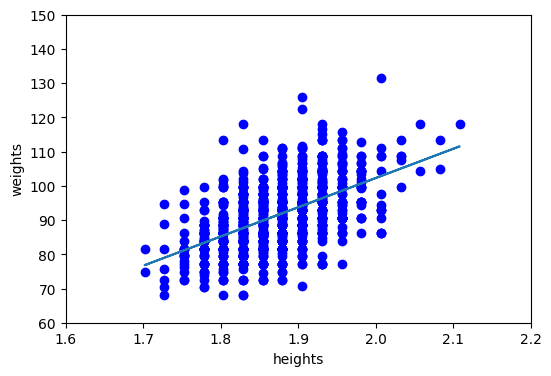

In [19]:
## Biểu diễn trực quan kết quả của hàm sklearn
plt.figure(figsize = (6, 4))
plt.xlim(1.6, 2.2)
plt.ylim(60, 150)
plt.scatter(xHat[:,1], weights, color = "blue")
plt.plot(X, weights_predict_sklearn)
plt.xlabel("heights")
plt.ylabel("weights")
plt.show()

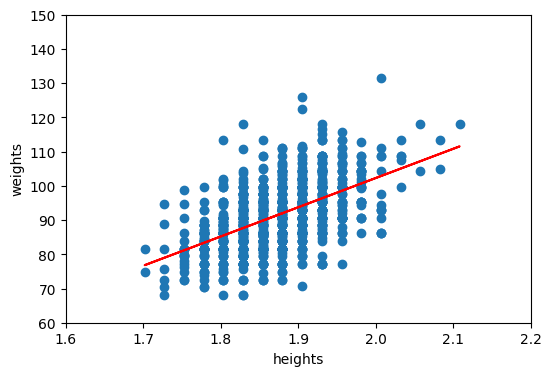

In [20]:
## Sử dụng regr.predict(xHat)
plt.figure(figsize = (6, 4))
plt.xlim(1.6, 2.2)
plt.ylim(60, 150)
plt.scatter(xHat[:,1], weights)
plt.plot(X, regr.predict(xHat), color = 'red')
plt.xlabel("heights")
plt.ylabel("weights")
plt.show()

---
## **Yêu cầu 3: Hồi quy tuyến tính dựa trên ma trận giả nghịch đảo**
---

In [21]:
## Các ma trận
A = xHat.T @ xHat
b = xHat.T @ y

## Vector tham số
w = np.linalg.pinv(A) @ b

slope3 = w[1]
bias3  = w[0]

weights_predict_PseudoInverse = slope3 * X + bias3
print('Phương trình hồi quy tuyến tính:')
print('   weight = (', slope3, ') * height + (', bias3, ')')

Phương trình hồi quy tuyến tính:
   weight = ( 85.42051043666294 ) * height + ( -68.55285156256211 )


---
## **Yêu cầu 4: Hồi quy tuyến tính dựa trên công thức hiệp phương sai**
---

In [22]:
## Tính toán thương số
mean_x  = np.mean(X)
delta_x = (X - mean_x).flatten()

mean_y  = np.mean(y)
delta_y = (y - mean_y).flatten()

numerator   = delta_x @ delta_y.T
denominator = delta_x @ delta_x.T

## Vector tham số
slope4  = numerator/denominator
bias4   = mean_y - (slope4 * mean_x)

weights_predict_cov = slope4 * X + bias4
print('Phương trình hồi quy tuyến tính:')
print('   weight = (', slope4, ') * height + (', bias4, ')\n')

Phương trình hồi quy tuyến tính:
   weight = ( 85.42051043674162 ) * height + ( -68.55285156270804 )

